**CP 5.3:**
Consider the integral $$E(x) = \int_{0}^{x} e^{{-t}^2} dt.$$
a) Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in steps of $0.1$.
Choose for yourself what method you will use for performing the integral and a
suitable number of slices.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def f(t):
    return np.exp(-t**2)
a = 0.0
b = 3.0
h = 0.1
N = (b - a) / h
s = 0.5 * f(a) + 0.5 * f(b)
ans = []
for i in range(1, int(N)):
    s += f(a + i * h)
    ans.append(h * s)
print(ans)

[0.14901115386512115, 0.24509009778035346, 0.33648321630747624, 0.4216975952040974, 0.49957767351123783, 0.569345306118341, 0.6306079455367826, 0.6833371879410874, 0.7278229945633816, 0.7646109386805258, 0.7944306666235145, 0.8181234424917266, 0.8365753948910255, 0.8506612369831301, 0.8612011594393165, 0.8689316334836464, 0.8744892547447947, 0.8784056442546935, 0.8811108289413284, 0.8829423928302017, 0.8841579106631932, 0.8849486160683524, 0.8854527920943215, 0.885767903254166, 0.8859609486677886, 0.8860768715851791, 0.8861451043904547, 0.8861844712945202, 0.8862067342802121]


b) When you are convinced your program is working, extend it further to make a
graph of $E(x)$ as a function of $x.$

Text(0, 0.5, 'Y-axis')

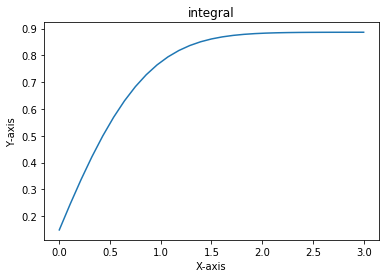

In [2]:
x = np.linspace(0, 3, 29)
plt.plot(x, ans)
plt.title('integral')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

**CP 5.4**: The diffraction limit of a telescope
Our ability to resolve detail in astronomical observations is limited by the diffraction of
light in our telescopes. Light from stars can be treated effectively as coming from a point
source at infinity. When such light, with wavelength λ, passes through the circular
aperture of a telescope (which we’ll assume to have unit radius) and is focused by the
telescope in the focal plane, it produces not a single dot, but a circular diffraction pattern
consisting of central spot surrounded by a series of concentric rings. The intensity of
the light in this diffraction pattern is given by $$I(r) = (\frac{J_1 (kr)}{kr})^2,$$
where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k = 2 \pi / \lambda$, and $J_1 (x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by $$J_m (x) = \frac{1}{\pi} \int_0^\pi \cos(m \theta - x \sin\theta) d\theta,$$
where m is a nonnegative integer and $x \geq 0.$
a) Write a Python function $J(m,x)$ that calculates the value of $J_m(x)$ using Simpson’s
rule with $N = 1000$ points. Use your function in a program to make a plot, on a
single graph, of the Bessel functions $J_0, J_1, \ and \ J_2$ as a function of $x$ from $x = 0$ to
$x = 20.$

Text(0.5, 1.0, 'Bessel Functions')

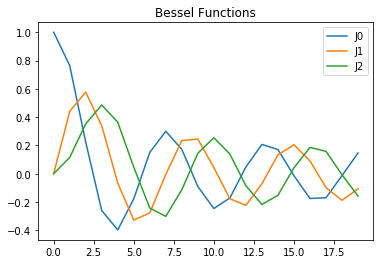

In [98]:
import math
def J(m, x):
    def f(theta):
        return np.cos(m * theta - x * np.sin(theta))
    a = 0.0
    b = np.pi
    sum1 = 0
    sum2 = 0
    N = 1000
    h = (b - a) / N
    s = f(a) + f(b) + 4 * f(b - h)
    for i in range(1, N // 2):
        s += 4 * f(a + (2 * i - 1) * h) + 2 * f(a + 2 * i * h)
    
    return(h / 3 * s / math.pi)

J0 = [J(0, x) for x in range(0, 20)]
J1 = [J(1, x) for x in range(0, 20)]
J2 = [J(2, x) for x in range(0, 20)]
x = np.linspace(0, 19, 20)
plt.plot(x, J0)
plt.plot(x, J1)
plt.plot(x, J2)
plt.legend(['J0', 'J1', 'J2'])
plt.title('Bessel Functions')

b) Make a second program that makes a density plot of the intensity of the circular
diffraction pattern of a point light source with λ = 500 nm, in a square region of
the focal plane, using the formula given above. Your picture should cover values
of r from zero up to about 1 µm.

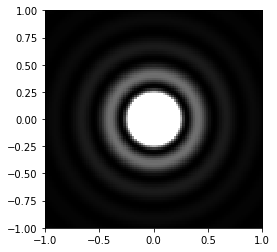

In [100]:
from pylab import *
x,y = mgrid[-1:1:100j,-1:1:100j]
r = np.sqrt(x**2 + y**2)
wavelength = 0.5
k = 2 * pi / wavelength
I = (J(1, r * k) / k / r)**2
gray()
imshow(I,vmax=0.1/10,extent=(-1,1,-1,1))
show()

**CP 5.7:** Consider the integral
$$I = \int_0^1 \sin^2 \sqrt{100x} dx$$
a) Write a program that uses the adaptive trapezoidal rule method of Section 5.3
and Eq. (5.34) to calculate the value of this integral to an approximate accuracy
of $\epsilon = 10^{-6}$
(i.e., correct to six digits after the decimal point). Start with one single
integration slice and work up from there to two, four, eight, and so forth. Have your program print out the number of slices, its estimate of the integral, and its
estimate of the error on the integral, for each value of the number of slices N,
until the target accuracy is reached. (Hint: You should find the result is around
I = 0.45.)


In [114]:
def f(x):
    return np.sin(np.sqrt(100 * x))**2

b) Now modify your program to evaluate the same integral using the Romberg integration technique described in this section. Have your program print out a
triangular table of values, as on page 161, of all the Romberg estimates of the integral. Calculate the error on your estimates using Eq. (5.49) and again continue
the calculation until you reach an accuracy of $\epsilon = 10^{−6}$
. You should find that
the Romberg method reaches the required accuracy considerably faster than the
trapezoidal rule alone.

In [112]:
def f(x):
    return np.sin(np.sqrt(100*x))**2

def trap_rule(f,a,b,N):

    h = (b - a) / N
    s = 0
    for k in range(1, N // 2 + 1):
        s += f(a + (2 * k - 1) * h)
    return s * h

a = 0.0
b = 1.0


I = (b - a) / 2 * (f(b) + f(a))
epsilon = 1
N = 1

R = np.empty((100,100))
R[0, 0] = I
i = 0
while epsilon > 10**(-6):
    N *= 2
    i += 1
    I_o = R[i - 1, 0]
    I_n = I_o / 2 + trap_rule(f, a , b, N)
    R[i, 0] = I_n
    s = '\t'
    s += '{0:.7f}'.format(R[i, 0])
    for n in range(i):
        R[i, n + 1] =R[i, n] + 1 / (4**(n + 1) - 1) * (R[i, n] - R[i - 1, n])
        s += ' {0:.7f}'.format(R[i, n])
    print(s)

    epsilon = abs(R[i, n + 1]-R[i-1, n])

	0.3252319 0.3252319
	0.5122829 0.5122829 0.5746332
	0.4029974 0.4029974 0.3665690 0.3526980
	0.4301034 0.4301034 0.4391387 0.4439767 0.4454255
	0.4484147 0.4484147 0.4545184 0.4555437 0.4557274 0.4557678
	0.4539129 0.4539129 0.4557457 0.4558275 0.4558320 0.4558324 0.4558325
	0.4553485 0.4553485 0.4558270 0.4558325 0.4558325 0.4558325 0.4558325 0.4558325


**CP 5.9: Heat capacity of a solid** $$\$$

Debye’s theory of solids gives the heat capacity of a solid at temperature $T$ to be $$C_V = 9V\rho k_b (\frac{T}{\theta_D})^3 \int_0^{\theta_D / T} \frac{x^4 e^x}{(e^x - 1)^2} dx,$$
where $V$ is the volume of the solid, $\rho$ is the number density of atoms, $k_B$ is Boltzmann’s
constant, and $\theta_D$ is the so-called Debye temperature, a property of solids that depends on
their density and speed of sound.
a) Write a Python function $cv(T)$ that calculates $C_V$ for a given value of the temperature, for a sample consisting of 1000 cubic centimeters of solid aluminum,
which has a number density of $\rho = 6.022 \times 10^{28} m^{−3}$ and a Debye temperature
of $\theta_D = 428 \ K$. Use Gaussian quadrature to evaluate the integral, with $N = 50$
sample points

In [81]:
from scipy.special.orthogonal import p_roots
def f(x):
    return (x**4 * math.e**x) / ((math.e**x -1)**2)

def cv(T):
    rho = 6.022 * 10**28
    theta_D = 428
    V = 1000
    N = 50
    a = 0.0
    b = theta_D / T
    k_b = 1.3807 * 10**(-23)
    x, w = p_roots(N)
    xp = 0.5 * (b - a) * x + 0.5 * (b + a)
    wp = 0.5 * (b - a) * w
    s = 0.0
    for i in range(N):
        s += wp[i] * f(xp[i])
    return 9 * V * rho * k_b * (T / theta_D)**3 * s


b) Use your function to make a graph of the heat capacity as a function of temperature from T = 5 K to T = 500 K.


Text(0.5, 1.0, 'Heat Capacity as a function of Temperature')

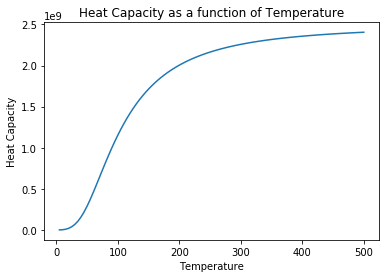

In [7]:
T = np.linspace(5, 500, 100)
CV = [cv(t) for t in T]
plt.plot(T, CV)
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.title('Heat Capacity as a function of Temperature')

**CP 5.10: Period of an anharmonic oscillator**
The simple harmonic oscillator crops up in many places. Its behavior can be studied
readily using analytic methods and it has the important property that its period of oscillation is a constant, independent of its amplitude, making it useful, for instance, for
keeping time in watches and clocks.
Frequently in physics, however, we also come across anharmonic oscillators, whose
period varies with amplitude and whose behavior cannot usually be calculated analytically. A general classical oscillator can be thought of as a particle in a concave potential
well. When disturbed, the particle will rock back and forth in the well:
The harmonic oscillator corresponds to a quadratic potential $V(x) ∝ x^
2$
. Any other form
gives an anharmonic oscillator. (Thus there are many different kinds of anharmonic
oscillator, depending on the exact form of the potential.)
One way to calculate the motion of an oscillator is to write down the equation for
the conservation of energy in the system. If the particle has mass m and position x, then
the total energy is equal to the sum of the kinetic and potential energies thus:
$$E = \frac{1}{2}m(\frac{dx}{dt})^2 + V(x)$$
Since the energy must be constant over time, this equation is effectively a (nonlinear)
differential equation linking x and t.
Let us assume that the potential $V(x)$ is symmetric about $x = 0$ and let us set our
anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at
position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$
and the equation above reads $E = V(a)$, which gives us the total energy of the particle
in terms of the amplitude. $$ $$
a) When the particle reaches the origin for the first time, it has gone through one
quarter of a period of the oscillator. By rearranging the equation above for $dx/dt$
and then integrating with respect to t from 0 to $\frac{1}{
4}
T$, show that the period $T$ is
given by
$$T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}}$$

b) Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1.$ Write a
Python function that calculates the period of the oscillator for given amplitude a
using Gaussian quadrature with $N = 20$ points, then use your function to make
a graph of the period for amplitudes ranging from $a = 0$ to $a = 2.$ $$ $$
c) You should find that the oscillator gets faster as the amplitude increases, even
though the particle has further to travel for larger amplitude. And you should
find that the period diverges as the amplitude goes to zero. How do you explain
these results?


**Part a)** $$ $$
$$E = \frac{1}{2}m(\frac{dx}{dt})^2 + V(x)$$
$$(\frac{dx}{dt})^2 =(E - V(x))\frac{2}{m}$$
$$\frac{dx}{dt} = \sqrt{(E - V(x))\frac{2}{m}}$$
$$dt = \frac{dx}{\sqrt{(E - V(x))\frac{2}{m}}}$$
$$\int_0^{.25T} dt = \int \frac{dx}{\sqrt{(E - V(x))\frac{2}{m}}}$$
$$T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}}$$

C:\Users\John Peterson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
C:\Users\John Peterson\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


Text(0, 0.5, 'Period')

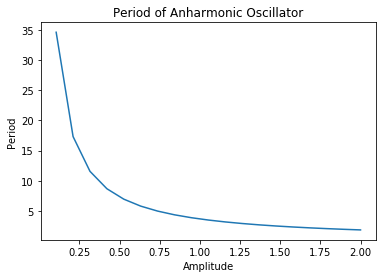

In [102]:
def V(x):
    return x**4


def period(a):
    def f(x):
        return 1 / ((V(a) - V(x))**(0.5))
    N = 20
    int_a = 0.0
    b = a
    m = 1
    x, w = p_roots(N)
    xp = 0.5 * (b - int_a) * x + 0.5 * (b + int_a)
    wp = 0.5 * (b - int_a) * w
    s = 0.0
    for i in range(N):
        s += wp[i] * f(xp[i])
    return (8 * m)**0.5 * s
amps = np.linspace(0, 2, 20)
periods = [period(a) for a in amps]
plt.plot(amps, periods)
plt.title('Period of Anharmonic Oscillator')
plt.xlabel('Amplitude')
plt.ylabel('Period')

**CP 5.11:**
Suppose a plane wave of wavelength $\lambda$, such as light or a sound wave, is
blocked by an object with a straight edge. The wave will be diffracted at the edge and the resulting intensity at the position $(x, z)$
marked by the dot is given by near-field diffraction theory to be $$I = \frac{I_0}{8} ( [2C(u) + 1]^2 + [2S(u) + 1]^2)$$
where $I_0$ is the intensity of the wavev before diffraction and $$u = x \sqrt{\frac{2}{\lambda z}}, \ C(u) = \int_0^u \cos \frac{1}{2} \pi t^2 dt, \ S(u) = \int_0^u sin \frac{1}{2} \pi t^2 dt$$
Write a program to calculate $I/I_0$ and make a plot of it as a function of $x$ in the range
$−5 m$ to $5 m$ for the case of a sound wave with wavelength $\lambda = 1 m$, measured $z = 3 m$
past the straight edge. Calculate the integrals using Gaussian quadrature with $N = 50$
points. You should find significant variation in the intensity of the diffracted sound—
enough that you could easily hear the effect if sound were diffracted, say, at the edge of
a tall building.

Text(0, 0.5, 'Intesity')

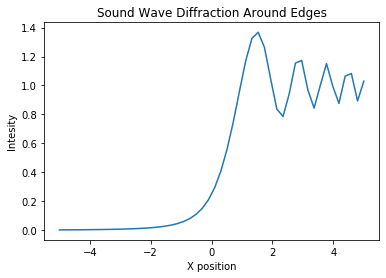

In [9]:
def I_I0(x):
    lmbda = 1
    z = 3
    N = 50
    u = x * (2 / (lmbda * z))**(0.5)
    def C_func(t):
        return math.cos(0.5 * math.pi * t**2)
    def S_func(t):
        return math.sin(0.5 * math.pi * t**2)
    a = 0.0
    b = u
    xr, w = p_roots(N)
    xp = 0.5 * (b - a) * xr + 0.5 * (b + a)
    wp = 0.5 * (b - a) * w
    C = 0.0 
    S = 0.0
    for i in range(N):
        C += wp[i] * C_func(xp[i])
        S += wp[i] * S_func(xp[i])
    return ((2 * C + 1)**2 + (2 * S + 1)**2) / 8
x = np.linspace(-5, 5, 50)
y = [I_I0(xi) for xi in x]
plt.plot(x, y)
plt.title('Sound Wave Diffraction Around Edges')
plt.xlabel('X position')
plt.ylabel('Intesity')

**CP 5.12: The Stefan–Boltzmann constant**
The Planck theory of thermal radiation tells us that in the (angular) frequency interval ω
to $\omega + d\omega$, a black body of unit area radiates electromagnetically an amount of thermal
energy per second equal to $I(\omega) d\omega$, where
$$I(w) = \frac{h}{4 \pi^2 c^2} \frac{\omega^3}{(e^{h_{bar} \omega / k_B T} -1)}.$$
Here $h_{bar}$ is Planck’s constant over $2\pi$, $c$ is the speed of light, and $k_B$ is Boltzmann’s constant. $$ $$
a) Show that the total energy per unit area radiated by a black body is $$W = \frac{k_B^4 T^4}{4 \pi^2 c^2 h_{bar}^3} \int_0^\infty \frac{x^3}{e^x - 1} dx$$


$$I(w) = \frac{h}{4 \pi^2 c^2} \frac{\omega^3}{(e^{h_{bar} \omega / k_B T} -1)}.$$
$$

b) Write a program to evaluate the integral in this expression. Explain what method
you used, and how accurate you think your answer is

In [79]:
def f(z):
    return ((z / (1 - z))**3) / (math.e**(z / (1 - z)) -1) * 1 / (1 - z)**2

def W(z):
    N = 50
    a = 0.0
    b = 1.0
    x, w = p_roots(N)
    xp = 0.5 * (b - a) * x + 0.5 * (b + a)
    wp = 0.5 * (b - a) * w
    s = 0.0
    for i in range(N):
        s += wp[i] * f(xp[i])
    return s
z = 50
print(f'I used Guassian Quadrature with N = 50 to calculate the integral which gave me the result {W(z):4.3f}')
acc = (abs(5.670 * 10**(-8) - ((k_b**4) / (4 * math.pi**2 * c**2 * h_bar**3)) * W(z))) / (5.670 * 10**(-8)) * 100
print (f'I found my accuracy to be {acc:.3} percent')

I used Guassian Quadrature with N = 50 to calculate the integral which gave me the result 6.494
I found my accuracy to be 0.239 percent


C:\Users\John Peterson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


c) Even before Planck gave his theory of thermal radiation around the turn of the
20th century, it was known that the total energy W given off by a black body per
unit area per second followed Stefan’s law: $W = \sigma T^
4$
, where $\sigma$ is the Stefan–
Boltzmann constant. Use your value for the integral above to compute a value
for the Stefan–Boltzmann constant (in SI units) to three significant figures. Check
your result against the known value, which you can find in books or on-line. You
should get good agreement.

In [80]:
k_b = 1.3807 * 10**(-23)
c = 3 * 10**8
h_bar = 1.055 * 10**(-34)
print (f'My value for the Stefan-Boltzmann constant is {((k_b**4) / (4 * math.pi**2 * c**2 * h_bar**3)) * W(z):.4}')


My value for the Stefan-Boltzmann constant is 5.656e-08


C:\Users\John Peterson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


**5.13: Quantum uncertainty in the harmonic oscillator**
In units where all the constants are 1, the wavefunction of the nth energy level of
the one-dimensional quantum harmonic oscillator—i.e., a spinless point particle in a
quadratic potential well—is given by $$\Psi_n (x) = \frac{1}{\sqrt{2^n n!\sqrt{\pi}}} e^{-x^2 / 2} H_n(x)$$
for $n = 0 \dots \infty$, where $H_n(x)$ is the nth Hermite polynomial. Hermite polynomials
satisfy a relation somewhat similar to that for the Fibonacci numbers, although more
complex:
$$H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x).$$
The first two Hermite polynomials are $H_0(x) = 1$ and $H_1(x) = 2x.$ $$ $$

a) Write a user-defined function H(n,x) that calculates $H_n(x)$ for given $x$ and any
integer $n \geq 0$. Use your function to make a plot that shows the harmonic oscillator wavefunctions for $n = 0, 1, 2, \ and \ 3$, all on the same graph, in the range
$x = −4$ to $x = 4$. Hint: There is a function factorial in the math package that
calculates the factorial of an integer.


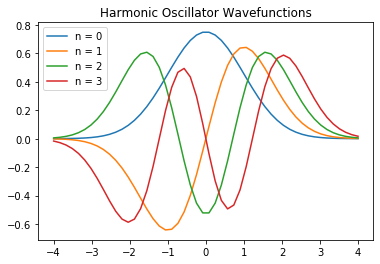

In [101]:
def cnst(n, x):
    return (math.e**(-x**2 / 2)) / ((2**n * math.factorial(n) * (math.pi)**(0.5))**(0.5))
def H(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        return 2 * x * H(n-1, x) - 2 * (n - 1) * H(n-2,x)  
x = np.linspace(-4, 4, 50)
n0 = [cnst(0, xi) * H(0, xi) for xi in x]
n1 = [cnst(1, xi) * H(1, xi) for xi in x]
n2 = [cnst(2, xi) * H(2, xi) for xi in x]
n3 = [cnst(3, xi) * H(3, xi) for xi in x]
plt.plot(x, n0)
plt.plot(x, n1)
plt.plot(x, n2)
plt.plot(x, n3)
plt.title('Harmonic Oscillator Wavefunctions')
plt.legend(['n = 0', 'n = 1', 'n = 2', 'n = 3'])


b) Make a separate plot of the wavefunction for $n = 30$ from $x = −10$ to $x = 10$.
Hint: If your program takes too long to run in this case, then you’re doing the
calculation wrong—the program should take only a second or so to run

Text(0.5, 1.0, 'Wavefunction n = 30')

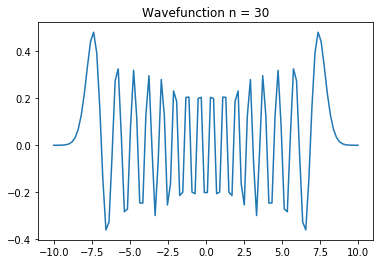

In [53]:
import scipy
x = np.linspace(-10, 10, 100)
n30 = [cnst(30, xi) * scipy.special.eval_hermite(30, xi) for xi in x]
plt.plot(x, n30)
plt.title('Wavefunction n = 30')

c) The quantum uncertainty of a particle in the nth level of a quantum harmonic
oscillator can be quantified by its root-mean-square position $\sqrt{\int_{-\infty}^\infty x^2 |\Psi_n (x) |^2 dx}$ Write a program that evaluates this integral using Gaussian quadrature on 100
points and then calculates the uncertainty (i.e., the root-mean-square position of
the particle) for a given value of n. Use your program to calculate the uncertainty
for n = 5. You should get an answer in the vicinity of $\sqrt{\int_{-\infty}^\infty x^2 |\Psi_n (x) |^2 dx} = 2.3.$

In [71]:
def rms_int(n, x):
    def f(x):
        return abs(cnst(n, math.tan(x)) * H(n, math.tan(x)))**2 * math.tan(x)**2 / math.cos(x)**2
    N = 100
    a = -math.pi / 2
    b = math.pi / 2
    x, w = p_roots(N)
    xp = 0.5 * (b - a) * x + 0.5 * (b + a)
    wp = 0.5 * (b - a) * w
    s = 0.0
    for i in range(N):
        s += wp[i] * f(xp[i])
    return s
print(rms_int(5, x))

5.4999999993805835


**5.19 Diffraction gratings:** Light with wavelength λ is incident on a diffraction grating
of total width $\omega$, gets diffracted, is focused with a lens of focal length $f$ , and falls on a
screen.
Theory tells us that the intensity of the diffraction pattern on the screen, a distance $x$
from the central axis of the system, is given by $$I(x) = |\int_{-\omega/2}^{\omega/2} \sqrt{q(u)} e^{i2\pi x u / \lambda f} du |^2,$$
where $q(u)$ is the intensity transmission function of the diffraction grating at a distance u from the central axis, i.e., the fraction of the incident light that the grating lets
through. $$ $$
a) Consider a grating with transmission function $q(u) = \sin^2 \alpha u$. What is the separation of the “slits” in this grating, expressed in terms of $\alpha$?


b) Write a Python function $q(u)$ that returns the transmission function $q(u)$ as above at position $u$ for a grating whose slits have separation $20 \mu m$.


In [ ]:
def q(u):
    return math.sin(alpha * u)**2

c) Use your function in a program to calculate and graph the intensity of the diffraction pattern produced by such a grating having ten slits in total, if the incident
light has wavelength $\lambda = 500 \ nm$. Assume the lens has a focal length of 1 meter
and the screen is 10 cm wide. You can use whatever method you think appropriate
for doing the integral. Once you’ve made your choice you’ll also need to decide
the number of sample points you’ll use. What criteria play into this decision?
Notice that the integrand in the equation for $I(x)$ is complex, so you will have
to use complex variables in your program. As mentioned in Section 2.2.5, there is
a version of the math package for use with complex variables called cmath. In particular you may find the exp function from cmath useful because it can calculate
the exponentials of complex arguments

d) Create a visualization of how the diffraction pattern would look on the screen
using a density plot (see Section 3.3).

e) Modify your program further to make pictures of the diffraction patterns produced by gratings with the following profiles:

i) A transmission profile that obeys $q(u) = \sin^2
\alpha u \sin^2
\beta u$, with $\alpha$ as before and
the same total grating width $\omega$, and $β = \frac{1}{
2}\alpha$.

ii) Two “square” slits, meaning slits with 100% transmission through the slit
and 0% transmission everywhere else. Calculate the diffraction pattern for
non-identical slits, one 10 µm wide and the other 20 µm wide, with a 60 µm
gap between the two.
